In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [87]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [88]:
from IPython.display import Image
    

bank_fraud_xls = './data/금융사기_성별 데이터.xlsx'

In [89]:
bank_fraud_df = pd.read_excel(bank_fraud_xls, sheet_name='최근 1년')
bank_fraud_df.head(5)

,고유번호,성별,피해금액구간,최소값,최대값,피해범위,등록일시,등록년월
0,283904,남자,10000-100000,10000,100000,1백 미만,2.022053e+19,2022.05
1,283903,남자,300000-400000,300000,400000,1백 미만,2.022053e+19,2022.05
2,283902,여자,900000-1000000,900000,1000000,1백 미만,2.022053e+19,2022.05
3,283901,여자,900000-1000000,900000,1000000,1백 미만,2.022053e+19,2022.05
4,283900,여자,900000-1000000,900000,1000000,1백 미만,2.022053e+19,2022.05


In [90]:
len(bank_fraud_df['고유번호'])

195288

In [91]:
bank_fraud_df['등록년월']

0         2022.05
1         2022.05
2         2022.05
3         2022.05
4         2022.05
           ...   
195283    2021.06
195284    2021.06
195285    2021.06
195286    2021.06
195287    2021.06
Name: 등록년월, Length: 195288, dtype: float64

In [92]:
bank_fraud_df['성별'][0:5]

0    남자
1    남자
2    여자
3    여자
4    여자
Name: 성별, dtype: object

In [93]:
from functools import * 

In [94]:
def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

def get_group_count(bank_fraud_df_column) :
    return reduce(count_columns, bank_fraud_df_column, dict())

In [95]:
result1 = get_group_count(bank_fraud_df['성별'])
result1

{'남자': 134599, '여자': 60689}

In [96]:
result2 = get_group_count(bank_fraud_df['피해범위'])
result2

{'1백 미만': 174524,
 '1백~5백': 15608,
 '5백~1천': 2136,
 '1천~5천': 2656,
 '5천~1억': 348,
 '1억 이상': 16}

In [97]:
sex = list(result1.keys())
sex

['남자', '여자']

In [98]:
sex_cnt = list(result1.values())
sex_cnt

[134599, 60689]

In [99]:
fraud_range = list(result2.keys())
fraud_range 

['1백 미만', '1백~5백', '5백~1천', '1천~5천', '5천~1억', '1억 이상']

In [100]:
range_cnt = list(result2.values())
range_cnt

[174524, 15608, 2136, 2656, 348, 16]

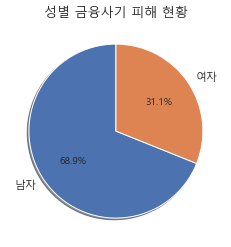

In [101]:
plt.figure(figsize=(4,4))
plt.pie(sex_cnt, labels=sex, autopct='%1.1f%%',shadow=True, startangle=90)  
plt.title("성별 금융사기 피해 현황", fontsize=13)
plt.show()

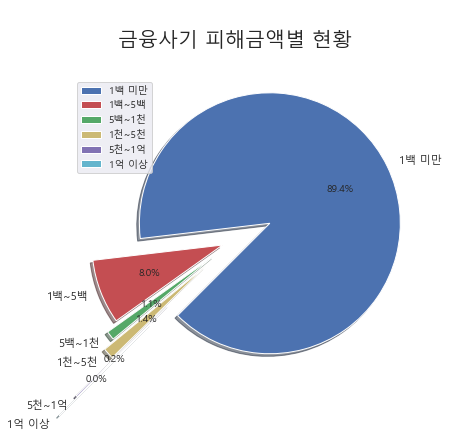

In [102]:
label=fraud_range
color=('b','r','g','y','m','c') 
plt.figure(figsize=(6,6))
explode = [0.3,0.1,0.2,0.3,0.7,0.9]
plt.pie(range_cnt, labels = label, colors = color,autopct='%1.1f%%',shadow=True, startangle=225, explode = explode)  
plt.title("\n금융사기 피해금액별 현황\n", fontsize=20)

plt.legend(loc = 2, fontsize =10)
plt.show()

In [103]:
bank_fraud_df['등록년월']

0         2022.05
1         2022.05
2         2022.05
3         2022.05
4         2022.05
           ...   
195283    2021.06
195284    2021.06
195285    2021.06
195286    2021.06
195287    2021.06
Name: 등록년월, Length: 195288, dtype: float64

In [104]:
len(bank_fraud_df['등록년월'][bank_fraud_df.성별=='남자'])

134599

In [105]:
len(bank_fraud_df['성별'][bank_fraud_df.성별=='남자'])

134599

In [106]:
len(bank_fraud_df['등록년월'][bank_fraud_df.등록년월==202205])

0

In [107]:
len(bank_fraud_df)

195288

In [108]:
idx = 0
bank_fraud_df_columns = []

element = bank_fraud_df['성별'][idx], bank_fraud_df['등록년월'][idx]

bank_fraud_df_columns.append(element)
bank_fraud_df_columns

[('남자', 2022.05)]

In [109]:
len(bank_fraud_df)

195288

In [110]:
bank_fraud_df_columns = []

for idx in range(len(bank_fraud_df)):
    element = bank_fraud_df['성별'][idx], bank_fraud_df['등록년월'][idx]
    bank_fraud_df_columns.append(element)
    
len(bank_fraud_df_columns)

195288

In [111]:
bank_fraud_df_columns[:10]

[('남자', 2022.05),
 ('남자', 2022.05),
 ('여자', 2022.05),
 ('여자', 2022.05),
 ('여자', 2022.05),
 ('남자', 2022.05),
 ('남자', 2022.05),
 ('남자', 2022.05),
 ('남자', 2022.05),
 ('남자', 2022.05)]

In [112]:
def get_group_count(bank_fraud_df_columns):
    print('len(bank_fraud_df_columns) :', len(bank_fraud_df_columns))
    
    def count_columns(result_dic, element_tuple):
        element1, element2 = element_tuple
        # print(element1, ':', element2)
        
        if not (result_dic.get(element1)):
            result_dic[element1] = {}
            
        if result_dic[element1].get(element2):
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1
        
        return result_dic
    
    result = reduce(count_columns, bank_fraud_df_columns, dict())
    return result

In [113]:
result4 = get_group_count(bank_fraud_df_columns)
result4

len(bank_fraud_df_columns) : 195288


{'남자': {2022.05: 11480,
  2022.04: 10849,
  2022.03: 13236,
  2022.02: 12709,
  2022.01: 11885,
  2021.12: 10228,
  2021.11: 11100,
  2021.1: 10366,
  2021.09: 10531,
  2021.08: 11291,
  2021.07: 10851,
  2021.06: 10073},
 '여자': {2022.05: 6188,
  2022.04: 5251,
  2022.03: 6454,
  2022.02: 5719,
  2022.01: 5439,
  2021.12: 4847,
  2021.11: 3279,
  2021.1: 5473,
  2021.09: 4409,
  2021.08: 4503,
  2021.07: 4742,
  2021.06: 4385}}

In [114]:
dict_element = result4['남자']
dict_element

{2022.05: 11480,
 2022.04: 10849,
 2022.03: 13236,
 2022.02: 12709,
 2022.01: 11885,
 2021.12: 10228,
 2021.11: 11100,
 2021.1: 10366,
 2021.09: 10531,
 2021.08: 11291,
 2021.07: 10851,
 2021.06: 10073}

In [115]:
dict_values = [dict_element[key] for key in dict_element.keys()]
dict_values

[11480,
 10849,
 13236,
 12709,
 11885,
 10228,
 11100,
 10366,
 10531,
 11291,
 10851,
 10073]

In [116]:
sum(dict_values)

134599

In [117]:
result4['여자'][2021.06]

4385

In [118]:
 month = [202106, 202107, 202108, 202109, 202110, 202111, 202112, 202201, 202202, 202203, 202204, 202205]

In [119]:
count_m = []
count_f = []
month = [2021.06, 2021.07, 2021.08, 2021.09, 2021.10, 2021.11, 2021.12, 2022.01, 2022.02, 2022.03, 2022.04, 2022.05]
for i in range(12):
    count_m.append(result4['남자'][month[i]])
    count_f.append(result4['여자'][month[i]])   

In [120]:
month, count_f, count_m

([2021.06,
  2021.07,
  2021.08,
  2021.09,
  2021.1,
  2021.11,
  2021.12,
  2022.01,
  2022.02,
  2022.03,
  2022.04,
  2022.05],
 [4385, 4742, 4503, 4409, 5473, 3279, 4847, 5439, 5719, 6454, 5251, 6188],
 [10073,
  10851,
  11291,
  10531,
  10366,
  11100,
  10228,
  11885,
  12709,
  13236,
  10849,
  11480])

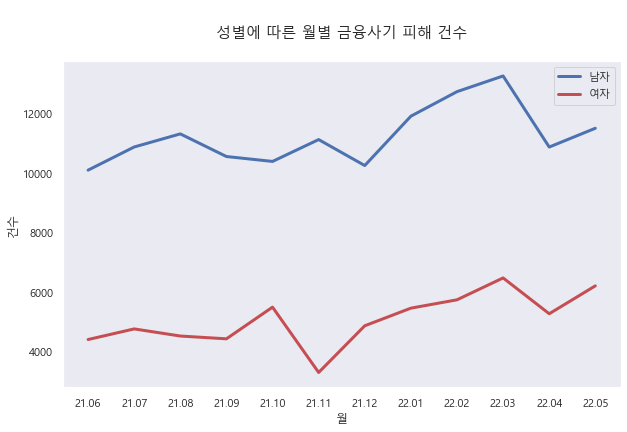

In [121]:
months = ['21.06', '21.07', '21.08', '21.09','21.10','21.11','21.12','22.01','22.02','22.03','22.04','22.05']
plt.figure(figsize = (10,6))
plt.plot(months, count_m, lw=3, label='남자')
plt.plot(months, count_f, 'r', lw=3, label='여자')
plt.grid()
plt.xlabel('월')
plt.ylabel('건수')
plt.legend()
plt.title('\n성별에 따른 월별 금융사기 피해 건수\n', fontsize=15)
plt.show()

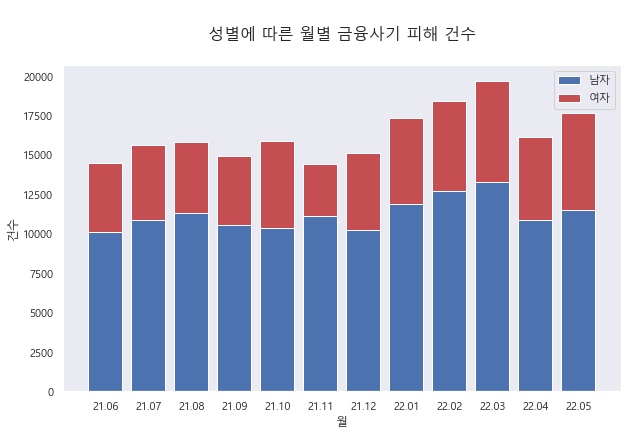

In [122]:
months = [0,1,2,3,4,5,6,7,8,9,10,11]
plt.figure(figsize = (10,6))
A = count_m 
B = count_f
X = np.arange(12)
plt.bar(X, A, color='b', label='남자')
plt.bar(X, B, color='r', bottom=A,label='여자')
plt.xticks(months, ('21.06', '21.07', '21.08', '21.09','21.10', '21.11','21.12','22.01','22.02','22.03','22.04','22.05'))
plt.grid()
plt.xlabel('월')
plt.ylabel('건수')
plt.legend()
plt.title('\n성별에 따른 월별 금융사기 피해 건수\n', fontsize =16)
plt.show()

In [123]:
idx = 0
bank_fraud_df_columns = []

element = bank_fraud_df['성별'][idx], bank_fraud_df['피해범위'][idx]

bank_fraud_df_columns.append(element)
bank_fraud_df_columns

[('남자', '1백 미만')]

In [124]:
bank_fraud_df_columns

[('남자', '1백 미만')]

In [125]:
bank_fraud_df_columns = []

for idx in range(len(bank_fraud_df)):
    element = bank_fraud_df['성별'][idx], bank_fraud_df['피해범위'][idx]
    bank_fraud_df_columns.append(element)
    
len(bank_fraud_df_columns)

195288

In [126]:
bank_fraud_df_columns[:10]

[('남자', '1백 미만'),
 ('남자', '1백 미만'),
 ('여자', '1백 미만'),
 ('여자', '1백 미만'),
 ('여자', '1백 미만'),
 ('남자', '1백 미만'),
 ('남자', '1백 미만'),
 ('남자', '1백 미만'),
 ('남자', '1백 미만'),
 ('남자', '1백 미만')]

In [127]:
def get_group_count2(bank_fraud_df_columns):
    print('len(bank_fraud_df_columns) :', len(bank_fraud_df_columns))
    
    def count_columns2(result_dic, element_tuple):
        element1, element2 = element_tuple
        # print(element1, ':', element2)
        
        if not (result_dic.get(element1)):
            result_dic[element1] = {}
            
        if result_dic[element1].get(element2):
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1
        
        return result_dic
    
    result = reduce(count_columns2, bank_fraud_df_columns, dict())
    return result

In [128]:
result = get_group_count2(bank_fraud_df_columns)
result

len(bank_fraud_df_columns) : 195288


{'남자': {'1백 미만': 120678,
  '1백~5백': 10923,
  '5백~1천': 1121,
  '1천~5천': 1722,
  '5천~1억': 148,
  '1억 이상': 7},
 '여자': {'1백 미만': 53846,
  '1백~5백': 4685,
  '1천~5천': 934,
  '5백~1천': 1015,
  '5천~1억': 200,
  '1억 이상': 9}}

In [129]:
result

{'남자': {'1백 미만': 120678,
  '1백~5백': 10923,
  '5백~1천': 1121,
  '1천~5천': 1722,
  '5천~1억': 148,
  '1억 이상': 7},
 '여자': {'1백 미만': 53846,
  '1백~5백': 4685,
  '1천~5천': 934,
  '5백~1천': 1015,
  '5천~1억': 200,
  '1억 이상': 9}}

In [130]:
count_m2 = []
count_f2 = []
money_range = ['1백 미만', '1백~5백', '5백~1천', '1천~5천', '5천~1억', '1억 이상']
for i in money_range:
    
    count_m2.append(result['남자'][i])
    count_f2.append(result['여자'][i])   

In [131]:
count_m2, count_f2

([120678, 10923, 1121, 1722, 148, 7], [53846, 4685, 1015, 934, 200, 9])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


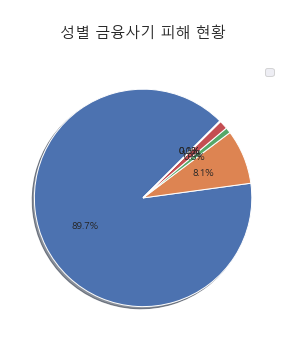

In [132]:
label= '1백 미만', '1~5백', '5백~1천', '1 ~ 5천', '5천~1억', '1억 이상'

plt.figure(figsize=(5,5))
plt.pie(count_m2, autopct='%1.1f%%',shadow=True, startangle=45)  
plt.title("\n성별 금융사기 피해 현황\n", fontsize=15)
plt.legend()
plt.show()

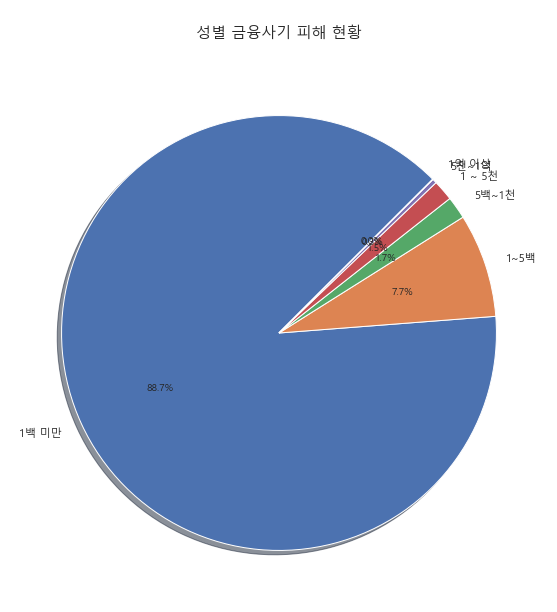

In [133]:
label= '1백 미만', '1~5백', '5백~1천', '1 ~ 5천', '5천~1억', '1억 이상'

plt.figure(figsize=(10,10))
plt.pie(count_f2, labels=label, autopct='%1.1f%%',shadow=True, startangle=45)  
plt.title("\n성별 금융사기 피해 현황\n", fontsize=15)
plt.show()

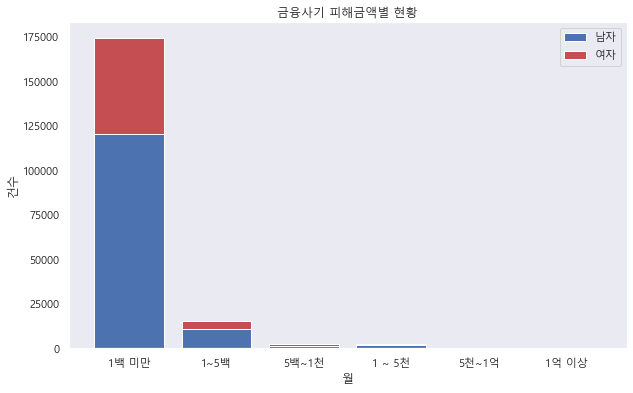

In [134]:
months = [0,1,2,3,4,5]
plt.figure(figsize = (10,6))
A = count_m2
B = count_f2
X = np.arange(6)
plt.bar(X, A, color='b', label='남자')
plt.bar(X, B, color='r', bottom=A,label='여자')
plt.xticks(months, ('1백 미만', '1~5백', '5백~1천', '1 ~ 5천', '5천~1억', '1억 이상'))
plt.grid()
plt.xlabel('월')
plt.ylabel('건수')
plt.legend()
plt.title('금융사기 피해금액별 현황')
plt.show()